In [7]:
from __future__  import print_function, division
import pylab as pl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
%pylab inline
import os
import json
os.environ["PUIDATA"] = "%s//Desktop/PUI/PUIDATA"%os.getenv("HOME")

Populating the interactive namespace from numpy and matplotlib


In [2]:
os.system('curl https://data.cityofnewyork.us/api/views/3qem-6v3v/rows.csv?accessType=DOWNLOAD>shelters.csv')
os.system('mv shelters.csv ' + os.getenv("PUIDATA"))

0

## This dataset has been provided by the department of homeless services and contains information about the number of shelter buildings in each community district and borough of NYC. This data is of 31st July, 31st August and 30th September 2018 i.e. data for 3 months.

In [3]:
shelters = pd.read_csv(os.getenv("PUIDATA") +'/shelters.csv')

In [43]:
shelters.head()

,Report Date,Borough,Community District,Adult Family Comm Hotel,Adult Family Shelter,Adult Shelter,Adult Shelter Comm Hotel,FWC Cluster,FWC Comm Hotel,FWC Shelter
0,07/31/2018,Bronx,201,NaN,1.0,2.0,NaN,4.0,1.0,7.0
1,07/31/2018,Bronx,202,NaN,1.0,NaN,NaN,3.0,NaN,6.0
2,07/31/2018,Bronx,203,NaN,2.0,5.0,NaN,5.0,2.0,9.0
3,07/31/2018,Bronx,204,NaN,NaN,2.0,NaN,18.0,NaN,14.0
4,07/31/2018,Bronx,205,NaN,2.0,3.0,NaN,12.0,NaN,5.0


Text(0,0.5,'Count of shelters in each borough')

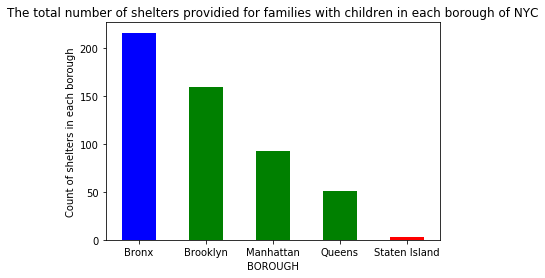

In [40]:
ax,fig = plt.subplots(1,1)
fig = (shelters.groupby('Borough')['FWC Shelter'].sum()).plot(kind='bar',\
        color=['b','g','g','g','r'])
plt.title('The total number of shelters providied for families with children in each borough of NYC')
plt.xticks(rotation='horizontal')
plt.xlabel('BOROUGH')
plt.ylabel('Count of shelters in each borough')

### Figure 1 : The plot shows the number of shelters provided for families with children for boroughes of New  York City.This dataset has been provided by the department of homeless services and contains information about the number of shelter buildings in each community district and borough of NYC. Shelter buildings is nothing but the number of shelters or in other words, the number of people( families in this case) that are provided shelter. This data is of 31st July, 31st August and 30th September 2018 i.e. data for 3 months. Bronx(blue) has the highest number of shelters while Staten Island(red) has very few which kind of makes sense as there are fewer homeless people in Staten Island and people from other brorughs would find it the least accessible of all the boroughs. 

### Note

#### I have tried to incorporate the inputs and criticisms provided by Cyrus(cb4102) and Sam(sm4372) in my corrected plot by better defining what I am trying to plot and improving the labelling and caption. Sam and Cyrus both suggested to report the count as a measure of borough population but, that would not be a better measure as the shelters aren't just for people from that brorough or specific district. It's just the count of resources the DHS can provide. Like, a homeless family from Manhattan can also get shelter in the Bronx or Brooklyn. Furthermore, shelter buildings actually doesn't actually mean an entire buidling; it is just the count of families that can be provided shelter. Shelter building is just a term that the DHS uses. Also, Sam suggested doing a time series rendering but the dataset is just 3 points of time; 1 for so that would not 